In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [56]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [57]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [58]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine)

In [59]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [60]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [61]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [62]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(most_recent_date)

('2017-08-23',)


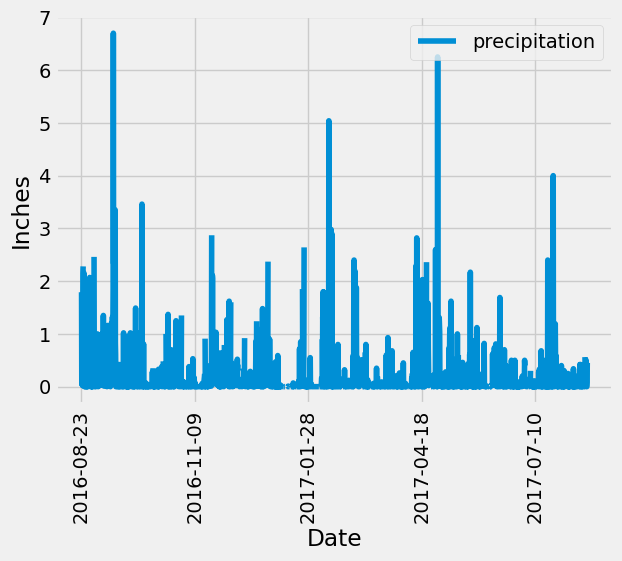

In [63]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_from_last_date = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
query = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year_from_last_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
date_df = pd.DataFrame(query, columns=('date','precipitation'))

# Sort the dataframe by date
date_df = date_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
date_df.plot(x='date',y='precipitation',rot=90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend(loc='upper right')
plt.show()



In [64]:
# Use Pandas to calcualte the summary statistics for the precipitation data
date_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [65]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [66]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

### Which station id has the greatest number of observations?
USC00519281

In [71]:
# Columns for reference
inspector = inspect(engine)
inspector.get_table_names()
columns_measurement = inspector.get_columns('measurement')
columns_station = inspector.get_columns('station')
for c in columns_measurement:
    print(c['name'])
print('----')  
for s in columns_station:
    print(s['name'])

id
station
date
prcp
tobs
----
id
station
name
latitude
longitude
elevation


In [97]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station_summary = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station=='USC00519281').all()
print("Most Active Station: Lowest, Highest, and Average Temperature")
print("Lowest Temp: ", active_station_summary[0][0])
print("Highest Temp: ", active_station_summary[0][1])
print("Average Temp: ", active_station_summary[0][2])


#print(f"Lowest Temp"+ session.query(func.min(Measurement.tobs))

Most Active Station: Lowest, Highest, and Average Temperature
Lowest Temp:  54.0
Highest Temp:  85.0
Average Temp:  71.66378066378067


In [107]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
import datetime as dt
from pandas.plotting import table

last_12_months_tobs = dt.date(2017,8,23) - dt.timedelta(days=365)

query = session.query(Measurement.tobs).\
    filter(Measurement.station=='USC00519281').filter(Measurement.date >= last_12_months_tobs).all()

most_active_station_df = pd.DataFrame(query)
most_active_station_df

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


Text(0.5, 0, 'Temperature')

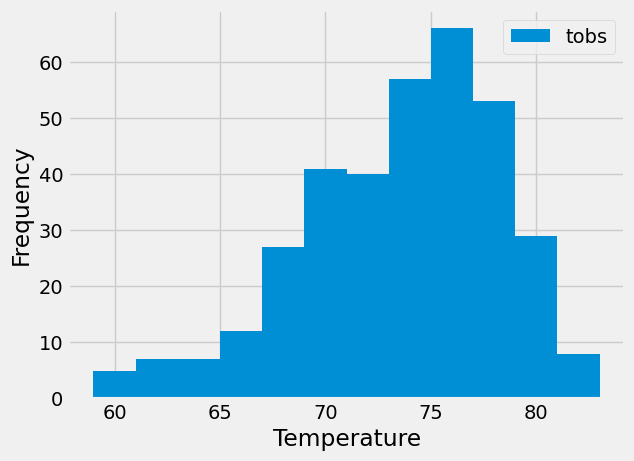

In [109]:
most_active_station_df.plot.hist(bins=12);
plt.xlabel('Temperature')

# Close session

In [ ]:
# Close Session
session.close()